In [27]:
import numpy as np

### 스핀 행렬

In [28]:
def mat(L):
    data = np.random.choice([-1, 1], size=(L, L)) # -1과 1 중에서 무작위로 LxL 개 뽑음
    return data

### 각 노드의 이웃 노드

In [29]:
def neighbor(array, n): # n번째 노드의 이웃 노드 인덱스(상하좌우 4개)를 찾음
    L, _ = array.shape

    # 상
    up = n-L # 윗쪽으로 한 칸 이동
    if up < 0: # 이동 전이 맨 윗쪽 열인 경우,
        up += L*L # 아랫쪽으로 L칸 이동하여 주기적 경계 조건 만족

    # 하
    down = n+L # 아랫쪽으로 한 칸 이동
    if down >= L*L: # 이동 전이 맨 아랫쪽 열인 경우,
        down -= L*L # 윗쪽으로 L칸 이동하여 주기적 경계 조건 만족

    # 좌
    left = n-1 # 왼쪽으로 한 칸 이동
    if (left+1)%L == 0: # 이동 전이 맨 왼쪽 열인 경우,
        left += L # 오른쪽으로 L칸 이동(= 아래로 한 칸 이동)하여 주기적 경계 조건 만족
    # 우
    right = n+1 # 오른쪽으로 한 칸 이동
    if right%L == 0: # 이동 후가 맨 왼쪽 열(= 이동 전이 맨 오른쪽 열)인 경우,
        right -= L # 왼쪽으로 L칸 이동(= 위로 한 칸 이동)하여 주기적 경계 조건 만족

    return [up, down, left, right] # 이웃 노드의 인덱스 리스트(상하좌우 순) 출력

### 각 노드의 에너지

In [30]:
def nb_energy(array, n):
    array_list = [item for sublist in array for item in sublist] # 행렬을 하나의 리스트로
    e = 0 # 에너지 초기화

    neighbors = neighbor(array, n) # neighbors: n번째 노드의 이웃 노드 리스트

    for i in neighbors:
        if array_list[n] == array_list[i]: # n번째 노드와 이웃 노드가 같은 스핀일 경우
            e -= 1 # -1을 sum
        else: # 다른 스핀일 경우
            e += 1 # +1을 sum

    return e # n번째 노드가 갖는 총 에너지 반환

### 행렬의 총 에너지

In [31]:
def E(array):
    N = len(array)**2 # N = L x L
    result = []

    for i in range(0,N): # 0~(N-1)번째 노드를 반복하여
        result.append(nb_energy(array, i)) # 각 노드의 총 에너지를 저장

    return sum(result)/2 # 각 노드의 총 에너지를 모두 더한 후, (a,b)와 (b,a)의 중복 제거를 위해 2로 나누어 반환

### (0514) 이웃 노드들의 스핀 합

In [32]:
def nb_sig(array, n):
    array_list = [item for sublist in array for item in sublist] # 행렬을 하나의 리스트로
    e = 0 # 에너지 초기화

    neighbors = neighbor(array, n) # neighbors: n번째 노드의 이웃 노드 리스트

    for i in neighbors:
        e += array_list[i] # 이웃 노드들의 스핀을 sum

    return e # n번째 노드가 갖는 총 에너지 반환

### (0514) Metropolis

In [33]:
import random
import copy
import matplotlib.pyplot as plt

In [34]:
def func(array, count, beta=1):
    mu = array # mu 초기화
    exps = [np.exp(-4*beta), np.exp(-8*beta)] # exp 계산을 한 번만
    E_list = []
    S_list = [] # <S>

    for _ in range(count):
        mu_list = [item for sublist in copy.copy(mu) for item in sublist] # 행렬을 하나의 리스트로
        k = random.randint(0, len(mu_list)-1) # 무작위로 인덱스를 뽑음 0~N

        delta = 2 * mu_list[k] * nb_sig(mu,k) # delta E = 2 * 해당 노드 스핀 * 이웃 노드 스핀 합

        if delta <= 0:
            mu_list[k] = -mu_list[k]
        elif delta == 4 and np.random.uniform(0,1) <= exps[0]:
            mu_list[k] = -mu_list[k]
        elif delta == 8 and np.random.uniform(0,1) <= exps[1]:
            mu_list[k] = -mu_list[k]

        mu = np.array(mu_list).reshape((len(array), len(array))) # flip 된 스핀을 포함한 새로운 mu

        E_list.append(E(mu))
        S_list.append(np.sum(mu)/len(mu)**2)

    return E_list, S_list

### (0521) Ising spin

In [35]:
import pandas

In [36]:
betas = np.arange(0.0, 1.1, 0.1).tolist() # x축 plot을 위해 beta 리스트 생성

In [37]:
def find_t(beta): # beta에 따른 tau를 구하는 함수
    E, _ = func(mat(5), 10000, beta)
    E = pandas.Series(E[200:]) # 초반 200개 번인
    ans = 0

    for i in range(1,501):
        ans += E.autocorr(lag=i) # lag을 1~500로 바꾸며 sum
    return ans

taus = [] # beta에 따른 tau를 저장할 리스트
for beta in range(0, 11):
    ans = find_t(0.1*beta) # beta를 0.0~1.0로 바꾸며 tau를 구함
    taus.append(ans)
    print(f'Beta = {0.1 * beta}, Tau = {ans}')

Beta = 0.0, Tau = 6.2455969753058955
Beta = 0.1, Tau = 12.695406984706393
Beta = 0.2, Tau = 15.31095681143878
Beta = 0.30000000000000004, Tau = 38.300723036463474
Beta = 0.4, Tau = 135.3902867065816
Beta = 0.5, Tau = 39.94462919435513
Beta = 0.6000000000000001, Tau = 36.089649773963444
Beta = 0.7000000000000001, Tau = 59.62161713673246
Beta = 0.8, Tau = 16.01468901804489
Beta = 0.9, Tau = 19.860303745208963
Beta = 1.0, Tau = 29.53479164764999


In [38]:
avg_Es = []
avg_Ss = []
err_Es = []
err_Ss = []

for i in range(0,11):
    e, s = func(mat(5), 10000, beta=0.1*i) # beta를 0.0~1.0으로 바꾸며
    e = e[200:] # 초반 번인
    s = s[200:]
    avg_Es.append(np.mean(e)) # E의 평균
    avg_Ss.append(abs(np.mean(s))) # spin의 평균

    t = round(taus[i]) *2 # 각 beta에 따른 tau, 안정성을 위해 반올림 후 2를 곱해 주었음
    new_Es = e[::t] # step이 tau인 새로운 리스트
    new_Ss = s[::t]

    errE = np.std(new_Es)/np.sqrt(len(new_Es)-1) # 표준오차
    err_Es.append(errE)
    errS = np.std(new_Ss)/np.sqrt(len(new_Ss)-1)
    err_Ss.append(errS)

print(err_Es, '\n', err_Ss)

[0.252920657752901, 0.37044465807222693, 0.40899130413509766, 0.979232710298944, 1.8816539806202055, 0.7083970424296769, 0.4916301203089758, 0.3639113351023202, 0.12597648014936305, 0.06490340870668886, 0.1349769559091899] 
 [0.006999387680163043, 0.012521290387871671, 0.01688462716088868, 0.042403738498386016, 0.11850432780342063, 0.0843053205454517, 0.006777393476843889, 0.004040031469611755, 0.0013041232761172243, 0.0006490340870668881, 0.0013497695590918982]


<ErrorbarContainer object of 3 artists>

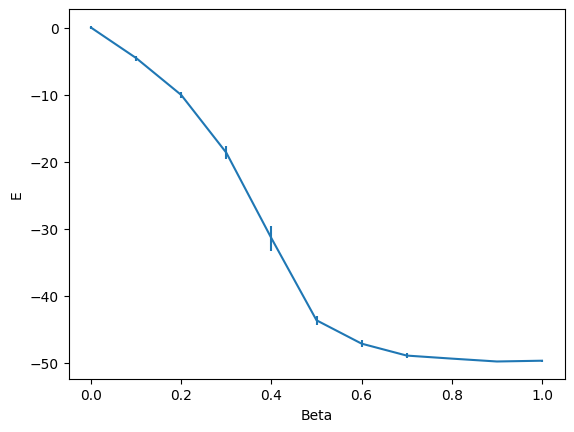

In [39]:
# E의 평균
plt.xlabel('Beta')
plt.ylabel('E')
plt.errorbar(betas, avg_Es, err_Es)

<ErrorbarContainer object of 3 artists>

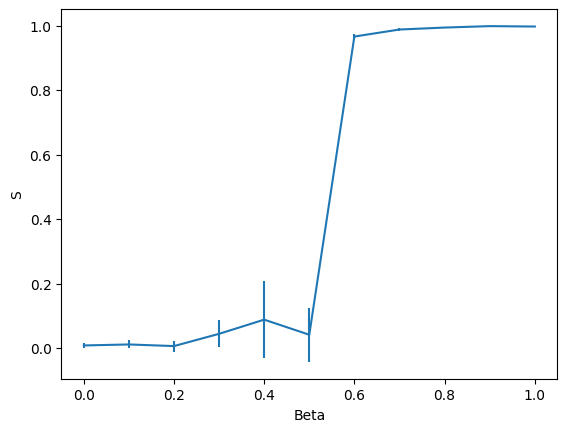

In [40]:
# spin의 평균
plt.xlabel('Beta')
plt.ylabel('S')
plt.errorbar(betas, avg_Ss, err_Ss)